In [37]:
#http://www.acgeospatial.co.uk/k-means-sentinel-2-python/

In [1]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array,ogr,osr
import matplotlib.pyplot as plt

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

In [2]:
# Read in raster image
input_raster=r"../urfa/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T_TOA/rgb_subset.tif"
# Read in raster image
img_ds = gdal.Open(input_raster, gdal.GA_ReadOnly)

In [3]:
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount))


In [4]:
img.shape

(352, 451, 3)

In [5]:
gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)

numpy.uint16

In [6]:
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()


In [7]:
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
new_shape

(158752, 3)

In [8]:
#img[:,:,number of band]
X = img[:, :, :3].reshape(new_shape)

In [11]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img[:, :, 0].shape)

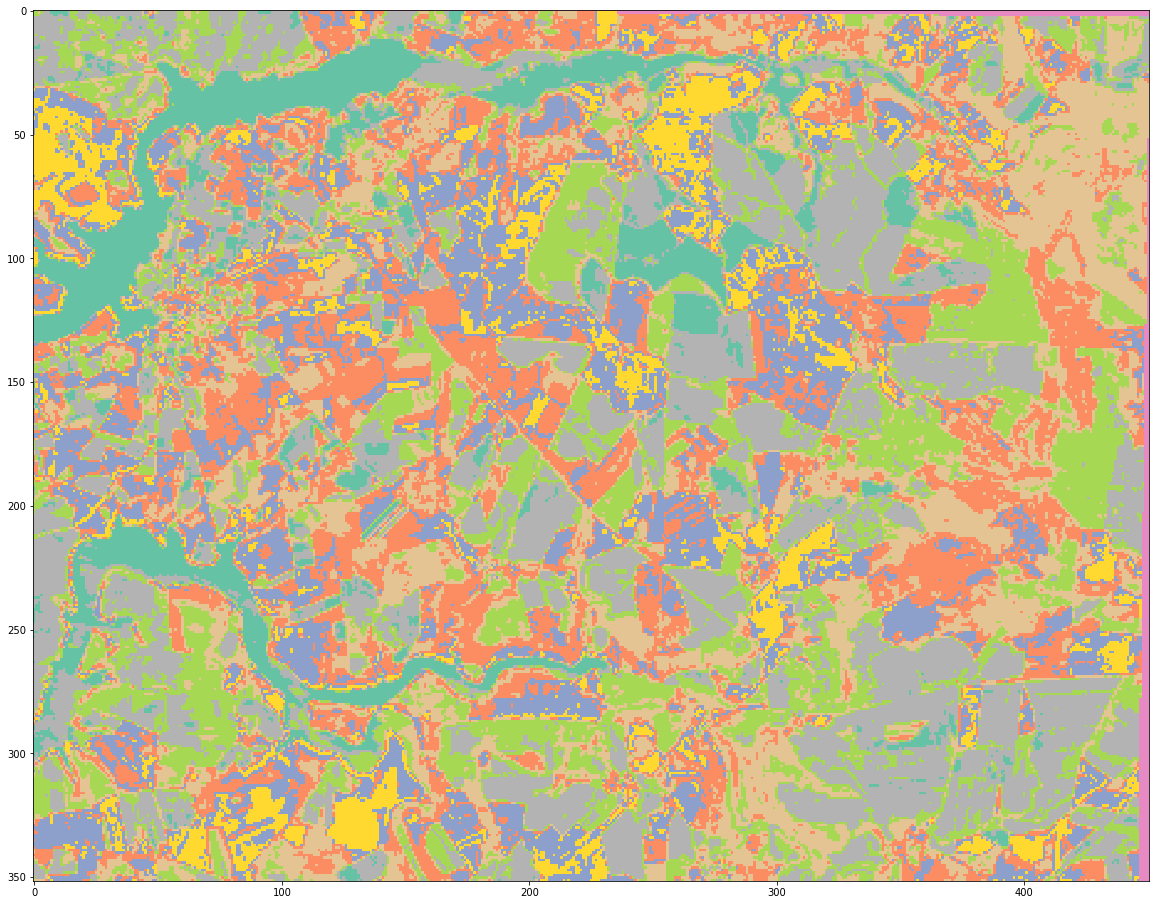

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="Set2")
plt.show()


In [33]:
MB_KMeans = cluster.MiniBatchKMeans(n_clusters=8)
MB_KMeans.fit(X)

X_cluster = MB_KMeans.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)

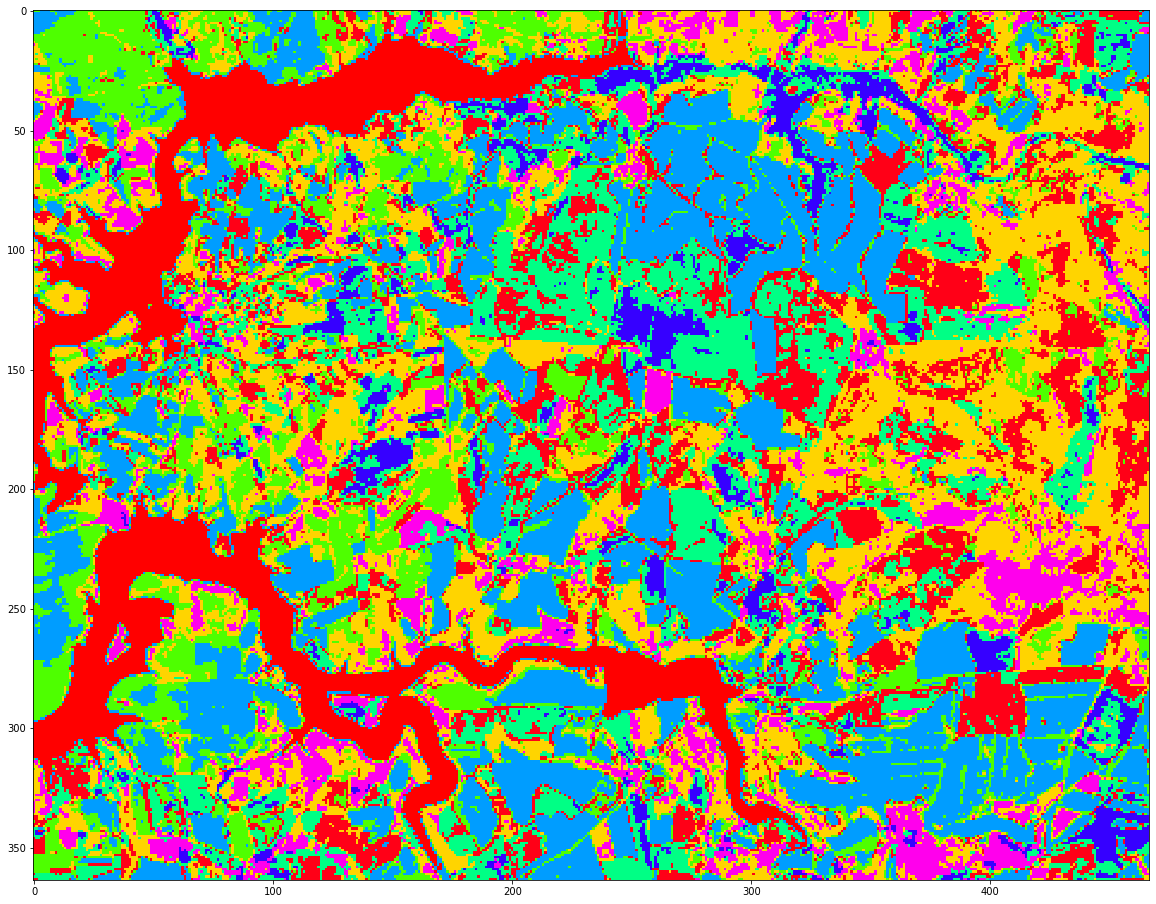

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()


In [56]:
ds = gdal.Open(input_raster)
band = ds.GetRasterBand(2)
arr = band.ReadAsArray()
[cols, rows] = arr.shape

format = "GTiff"
driver = gdal.GetDriverByName(format)

outDataRaster = driver.Create("../tez_data/gap/LC08_L1TP_173034_20190527_20190605_01_T1/class_result.tif", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection())##sets same projection as input
outDataRaster.GetRasterBand(1).WriteArray(X_cluster)
outDataRaster.FlushCache() ## remove from memory
del outDataRaster ## delete the data (not the actual geotiff)

In [69]:
command= 'gdal_polygonize.py {input1}  {output} -b 1 -f "ESRI Shapefile" class_result DN'
input1="../tez_data/gap/LC08_L1TP_173034_20190527_20190605_01_T1/class_result.tif"
output="../tez_data/gap/LC08_L1TP_173034_20190527_20190605_01_T1/cls_result.shp"



In [71]:
import os 
os.system(command.format(input1=input1,output=output))

0